<a href="https://colab.research.google.com/github/marciapg/Analise-de-Churn/blob/main/Analise_de_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de base de dados. Interesse: Churn

##Importação de bibliotecas e dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importação dos dados
data = pd.read_csv('base de dados.csv')
data.shape

(3333, 12)

In [3]:
data.head(5)

,time_active,monthly_bill,max_fee,has_data_plan,data_usage,day_mins,day_calls,age,plan,roam_mins,contract_renewal,churn
0,1,"73,9",9.25,1,2.19,208.0,115,20,2,8.1,1,0
1,1,"73,7",11.63,1,2.27,183.1,95,20,0,8.4,1,0
2,1,67,8.64,1,2.70,146.6,68,20,2,10.0,1,0
3,1,"61,5",14.83,0,0.25,196.1,107,20,0,7.0,1,0
4,1,43,7.59,0,0.00,175.2,74,20,0,5.3,1,0


##Análise descritiva e exploratória dos dados

In [4]:
#Verificação dos tipos dos dados
data.dtypes

time_active           int64
monthly_bill         object
max_fee             float64
has_data_plan         int64
data_usage          float64
day_mins            float64
day_calls             int64
age                   int64
plan                  int64
roam_mins           float64
contract_renewal      int64
churn                 int64
dtype: object

In [5]:
#Transformação dos dados da coluna monthly_bill de string para float
data.monthly_bill = data.monthly_bill.apply(lambda x: float(x.replace(",", ".")))
data.dtypes

time_active           int64
monthly_bill        float64
max_fee             float64
has_data_plan         int64
data_usage          float64
day_mins            float64
day_calls             int64
age                   int64
plan                  int64
roam_mins           float64
contract_renewal      int64
churn                 int64
dtype: object

In [6]:
#Verificação de dados faltantes
data.isnull().sum()/len(data)

time_active         0.0
monthly_bill        0.0
max_fee             0.0
has_data_plan       0.0
data_usage          0.0
day_mins            0.0
day_calls           0.0
age                 0.0
plan                0.0
roam_mins           0.0
contract_renewal    0.0
churn               0.0
dtype: float64

######A coluna 'monthly_bill' estava com os dados em formato string. Não há nenhum dado nulo na tabela.

###Gráficos descritivos

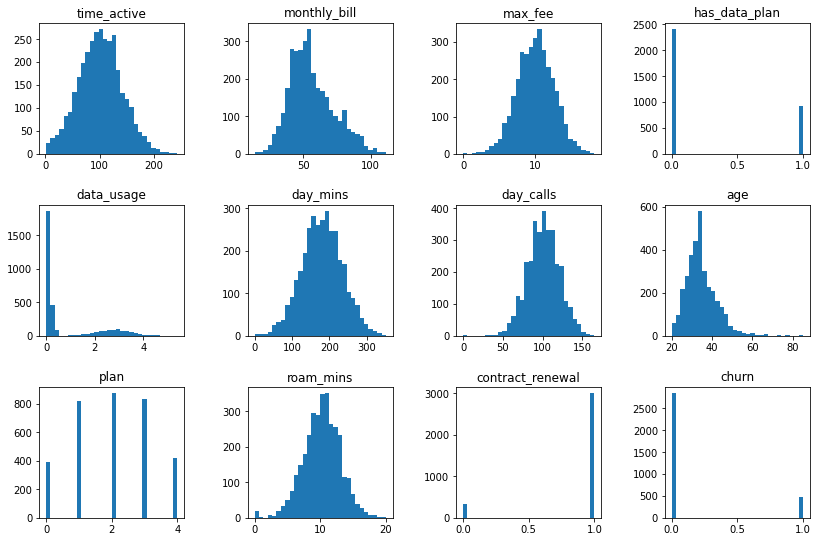

In [7]:
#Histogramas
fig, axs = plt.subplots(3,4,figsize= (12,8))
fig.tight_layout(pad=3.0)
colunas = data.columns
for i in range(3):
  for j in range(4):
    axs[i][j].hist(data[colunas[i*4+j]], bins = 30)
    axs[i][j].set_title(colunas[i*4+j])

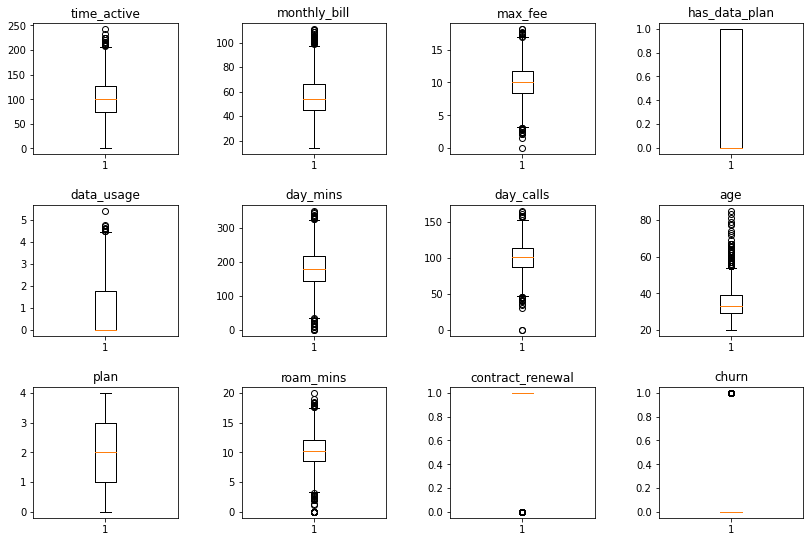

In [8]:
fig, axs = plt.subplots(3,4,figsize= (12,8))
fig.tight_layout(pad=3.0)
colunas = data.columns
for i in range(3):
  for j in range(4):
    axs[i][j].boxplot(data[colunas[i*4+j]])
    axs[i][j].set_title(colunas[i*4+j])

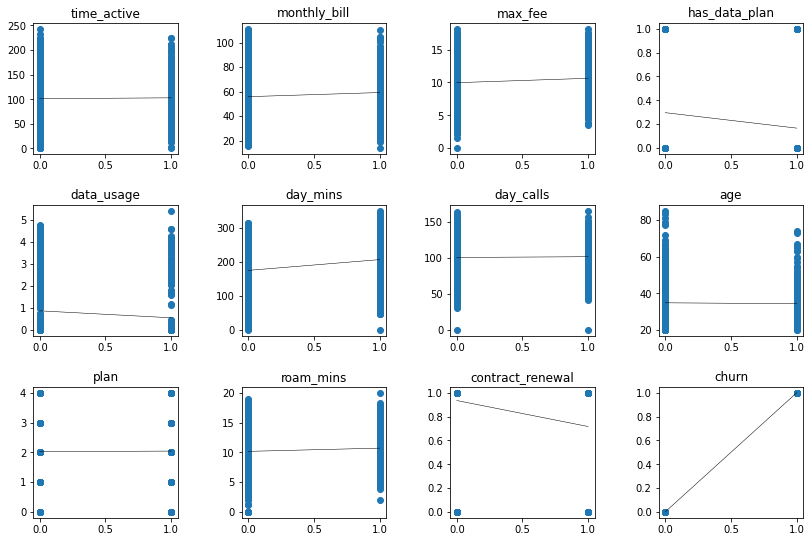

In [9]:
fig, axs = plt.subplots(3,4,figsize= (12,8))
fig.tight_layout(pad=3.0)
colunas = data.columns
for i in range(3):
  for j in range(4):
    axs[i][j].scatter(data['churn'],data[colunas[i*4+j]])
    b, a = np.polyfit(data['churn'],data[colunas[i*4+j]], deg=1)
    xseq = np.linspace(0, 1, num=100)
    axs[i][j].plot(xseq, a + b * xseq, color="k", lw=0.5);
    axs[i][j].set_title(colunas[i*4+j])

Pelos histogramas e boxplots, os dados parecem fazer sentido. Pelos gráficos de dispersão, percebemos que não há correlação muito forte entre as variáveis e o churn de forma isolada, a não ser na variável 'contract_renewal', que parece mais um pouco mais acentuada.

###Resumos das variáveis

In [10]:
for i in colunas:
  print(data[i].describe())

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: time_active, dtype: float64
count    3333.000000
mean       56.305161
std        16.426032
min        14.000000
25%        45.000000
50%        53.500000
75%        66.200000
max       111.300000
Name: monthly_bill, dtype: float64
count    3333.000000
mean       10.051488
std         2.535712
min         0.000000
25%         8.330000
50%        10.070000
75%        11.770000
max        18.190000
Name: max_fee, dtype: float64
count    3333.000000
mean        0.276628
std         0.447398
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_data_plan, dtype: float64
count    3333.000000
mean        0.816475
std         1.272668
min         0.000000
25%         0.000000
50%         0.000000
75%         1.780000
max         5.400000
Name: data_usage, dtype: 

######Pelos resumos dos dados, não foi verificada nenhuma anomalia. 

###Correlação

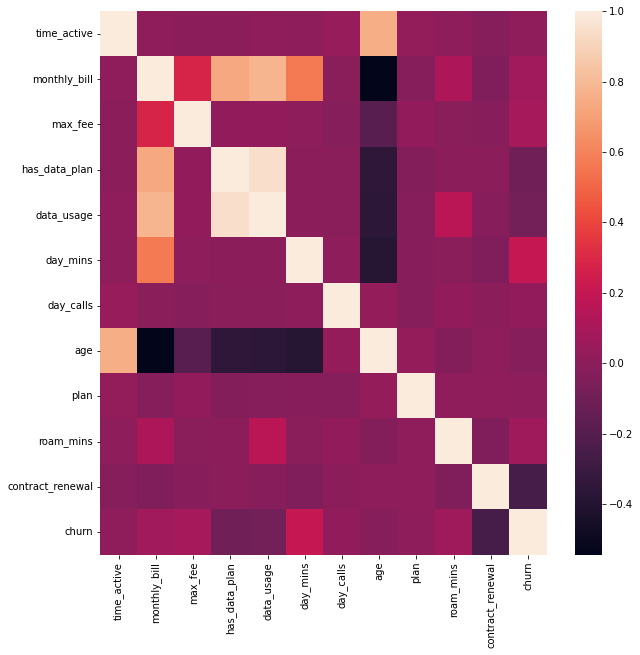

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

In [12]:
data.corr()

,time_active,monthly_bill,max_fee,has_data_plan,data_usage,day_mins,day_calls,age,plan,roam_mins,contract_renewal,churn
time_active,1.000000,0.012581,-0.006749,0.002918,0.014391,0.006216,0.038470,0.758364,0.025213,0.009514,-0.024735,0.016541
monthly_bill,0.012581,1.000000,0.281766,0.737490,0.781660,0.567968,-0.007963,-0.544159,-0.021644,0.117433,-0.047291,0.072313
max_fee,-0.006749,0.281766,1.000000,0.021526,0.019637,0.007038,-0.021449,-0.188872,0.020201,-0.011023,-0.019105,0.092812
has_data_plan,0.002918,0.737490,0.021526,1.000000,0.945982,-0.001684,-0.011086,-0.355811,-0.030896,-0.001318,-0.006006,-0.102148
data_usage,0.014391,0.781660,0.019637,0.945982,1.000000,0.003176,-0.007962,-0.359555,-0.022937,0.162746,-0.019223,-0.087195
day_mins,0.006216,0.567968,0.007038,-0.001684,0.003176,1.000000,0.006750,-0.382602,-0.017017,-0.010155,-0.049396,0.205151
day_calls,0.038470,-0.007963,-0.021449,-0.011086,-0.007962,0.006750,1.000000,0.029857,-0.024089,0.021565,-0.003755,0.018459
age,0.758364,-0.544159,-0.188872,-0.355811,-0.359555,-0.382602,0.029857,1.000000,0.029802,-0.030669,0.007355,-0.023047
plan,0.025213,-0.021644,0.020201,-0.030896,-0.022937,-0.017017,-0.024089,0.029802,1.000000,0.015374,0.011957,0.006431
roam_mins,0.009514,0.117433,-0.011023,-0.001318,0.162746,-0.010155,0.021565,-0.030669,0.015374,1.000000,-0.045871,0.068239


##Modelo de classificação

###Normalização dos dados

In [13]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
dtnorm = norm.fit_transform(data)
datanorm = pd.DataFrame(dtnorm, columns = data.columns)
datanorm.to_csv('dados_normalizados.csv')

In [14]:
#Separação das variáveis explicativas e resposta
y = datanorm['churn']
x = datanorm.drop(columns=['churn'],axis=1)

In [15]:
#Verificação de proporção dos dados de resposta
#Está desbalanceado
y.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [16]:
x.head(3)

,time_active,monthly_bill,max_fee,has_data_plan,data_usage,day_mins,day_calls,age,plan,roam_mins,contract_renewal
0,0.0,0.615622,0.508521,1.0,0.405556,0.592930,0.696970,0.0,0.5,0.405,1.0
1,0.0,0.613566,0.639362,1.0,0.420370,0.521950,0.575758,0.0,0.0,0.420,1.0
2,0.0,0.544707,0.474986,1.0,0.500000,0.417902,0.412121,0.0,0.5,0.500,1.0


###Verificação das variáveis que mais contribuem para explicar o churn

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
algo = SelectKBest(score_func=f_classif, k="all")
a = algo.fit_transform(x,y)
algo.scores_

array([9.11598199e-01, 1.75097868e+01, 2.89430416e+01, 3.51229436e+01,
       2.55192209e+01, 1.46350785e+02, 1.13541243e+00, 1.77022034e+00,
       1.37776550e-01, 1.55834680e+01, 2.41206004e+02])

In [18]:
algo.feature_names_in_

array(['time_active', 'monthly_bill', 'max_fee', 'has_data_plan',
       'data_usage', 'day_mins', 'day_calls', 'age', 'plan', 'roam_mins',
       'contract_renewal'], dtype=object)

###Contribuição das variáveis para diferenciar os valores de churn, por score e correlação
######1: 'contract_renewal': score=241.20, corr=-0.25
######2: 'day_mins': score=146.35, corr=0.20
######3: 'has_data_plan': score=35.12, corr=-0.10
######4: 'max_fee': score=28.94, corr=0.09
######5: 'data_usage': score=25.51, corr=-0.08
######6: 'monthly_bill': score=17.50, corr=0.07
######7: 'roam_mins': score=15.58, corr=0.06
######8: 'age': score=1.77, corr=-0.02
######9: 'day_calls': score=1.13, corr=0.01
######10: 'time_active': score=0.91, corr=0.01
######11: 'plan': score=0.13, corr=0.00


######Pelos valores, percebemos que as correlações são baixas, sendo a maior, entre a variável 'contract_renewal' e 'churn', -0.25.

###Modelo 1 de classificação usando todas as variáveis
######Neste caso, a opção foi pelo modelo de Random Forest, por já ter tido bons resultados com ele anteriormente. O ideal seria testar outros também.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import RandomizedSearchCV

In [20]:
#Testagem de hiperparâmetros do modelo
min_samples_split = [2,3,4,5,7,9]
max_depth = [9,11,13,15,17]
min_samples_leaf = [2,3,4,5]
valores = {'min_samples_split':min_samples_split, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

modelo = RandomForestClassifier(n_estimators=50, n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo,param_distributions=valores, cv=3, n_iter=50, n_jobs=-1)
search.fit(x,y)
print(search.best_score_, search.best_estimator_.min_samples_split, search.best_estimator_.max_depth, search.best_estimator_.min_samples_leaf)

0.9114911491149115 5 17 3


In [21]:
#A partir dos hiperparâmetros escolhidos, criação e testagem do modelo
modelo = RandomForestClassifier(n_estimators=50, n_jobs=-1, min_samples_split=5, max_depth=11, min_samples_leaf=2)
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3)
modelo.fit(x_treino, y_treino)
accuracy = modelo.score(x_teste, y_teste)
accuracy

0.907

O modelo utilizado alcançou 0.917 de acurácia, mesmo as correlações tendo valores baixos. 

###Modelo 2 de classificação usando apenas as variáveis de maior correlação
####Abaixo, foi utilizado um modelo com os mesmos hiperparâmetros, mas apenas as 4 principais variáveis explicativas (as de valores f e correlação mais altos). 

In [22]:
x2 = x[['contract_renewal','day_mins','has_data_plan', 'max_fee']]

In [23]:
modelo2 = RandomForestClassifier(n_estimators=50, n_jobs=-1, min_samples_split=5, max_depth=11, min_samples_leaf=2)
x2_treino, x2_teste, y_treino, y_teste = train_test_split(x2,y,test_size=0.3)
modelo2.fit(x2_treino, y_treino)
accuracy = modelo2.score(x2_teste, y_teste)
accuracy

0.901

A acurácia foi de 0.882, valor um pouco abaixo do resultado com todas as 10 variáveis.

###Matriz de confusão do Modelo 1

In [24]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
predicao = modelo.predict(x_teste)
matriz = confusion_matrix(y_teste, predicao)
matriz

array([[795,  64],
       [133,   8]])

Pela matriz de confusão, percebemos que o modelo classificou muito mais em apenas uma das opções, já que a proporção dos dados de resposta estão desbalanceadas.
Assim, classificando a maioria como 'não churn', ele acerta muito e a classificação não tem confiabilidade.

Para resolver isso, vamos balancear a quantidade de observações

###Balanceamento das observações

In [25]:
y.value_counts()

0.0    2850
1.0     483
Name: churn, dtype: int64

In [26]:
#Reduzir as observações de 'não churn' de forma aleatória
df_class_0 = datanorm[datanorm['churn'] == 0]
df_class_1 = datanorm[datanorm['churn'] == 1]
df_class_0_under = df_class_0.sample(483)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [27]:
#Separação das variáveis explicativas e resposta
y_under = df_test_under['churn']
x_under = df_test_under.drop(columns=['churn'],axis=1)

In [28]:
#dados balanceados
y_under.value_counts()

0.0    483
1.0    483
Name: churn, dtype: int64

###Modelo 3 de classificação usando os dados balanceados

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import RandomizedSearchCV

In [30]:
#Testagem de hiperparâmetros do modelo
min_samples_split = [2,3,4,5,7,9,11,13,15,17]
max_depth = [9,11,13,15,17]
min_samples_leaf = [2,3,4,5]
valores = {'min_samples_split':min_samples_split, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

modelo = RandomForestClassifier(n_estimators=50, n_jobs=-1)

search = RandomizedSearchCV(estimator=modelo,param_distributions=valores, cv=3, n_iter=50, n_jobs=-1)
search.fit(x_under,y_under)
print(search.best_score_, search.best_estimator_.min_samples_split, search.best_estimator_.max_depth, search.best_estimator_.min_samples_leaf)

0.5372670807453416 17 15 5


In [31]:
#A partir dos hiperparâmetros escolhidos, criação e testagem do modelo
modelo3 = RandomForestClassifier(n_estimators=50, n_jobs=-1, min_samples_split=9, max_depth=9, min_samples_leaf=5)
from sklearn.model_selection import train_test_split
x_under_treino, x_under_teste, y_under_treino, y_under_teste = train_test_split(x_under,y_under,test_size=0.3)
modelo3.fit(x_under_treino, y_under_treino)
accuracy = modelo3.score(x_under_teste, y_under_teste)
accuracy

0.7862068965517242

In [32]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
predicao = modelo3.predict(x_under_teste)
matriz = confusion_matrix(y_under_teste, predicao)
matriz

array([[136,  15],
       [ 47,  92]])

Estimando os valores de churn, com os dados balanceados, a acurácia foi de 0.76, e, pela matriz de confusão, é possível concluir que os valores preditos estão dentro de uma boa estimativa.